# Load packages

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

# Inital setting for plot size
from matplotlib import rcParams
FIGSIZE=(6, 6)
rcParams['figure.figsize']=FIGSIZE

# Load data

In [6]:
ad = sc.read('/sc/arion/projects/psychAD/NPS-AD/freeze2_rc/h5ad_final/AGING_2024-02-01_22_23.h5ad')
ad # 1,332,155 × 34,890

AnnData object with n_obs × n_vars = 1332155 × 34890
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1.S', 'G2.M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'Brain_bank', 'Age', 'Sex', 'Ethnicity', 'Education', 'PMI', 'Dx', 'pH', 'CERAD', 'BRAAK_AD', 'PLAQU

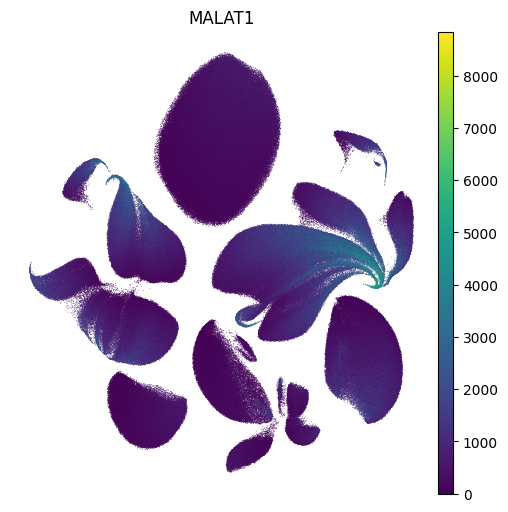

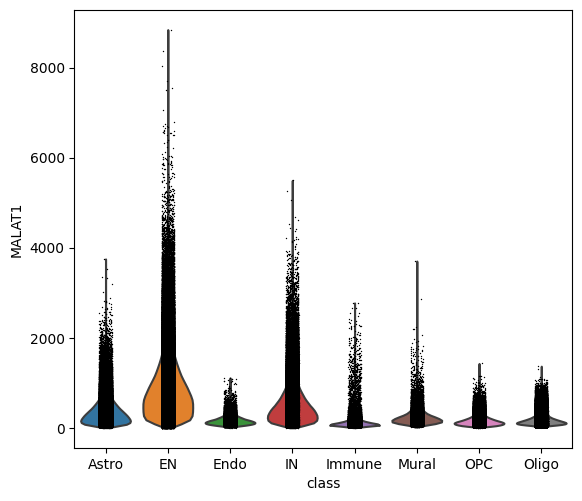

In [7]:
sc.pl.umap(ad, color = ['MALAT1'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)
sc.pl.violin(ad, ['MALAT1'], groupby='class')

In [2]:
test = sc.read('/sc/arion/projects/psychAD/NPS-AD/freeze2_proc/240124_PsychAD_freeze3_AGING_clean.h5ad')
test # 1,332,155 × 34,890

AnnData object with n_obs × n_vars = 1332155 × 34890
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane'
    var: 'gene_id', 'gene_name', 'gene_type', 'gene_chrom', 'gene_start', 'gene_end', 'n_cells', 'per

# Examination

## Features

### Channel

In [3]:
ad.obs['Channel'].value_counts()

M65019-2     6860
H1908-2      5907
H1856-1      5800
H977-2       5418
H2538-1      5418
             ... 
M863570-2      77
H1134-2        61
H823-2         46
M93603-2       45
M51374-1       40
Name: Channel, Length: 574, dtype: int64

### SubID

In [4]:
ad.obs['SubID'].value_counts() # 291

H977      10715
H2538     10631
M65019    10090
H1225      9921
H1880      9542
          ...  
H822        521
H1981       392
M81548      352
M51374      292
H1134        61
Name: SubID, Length: 291, dtype: int64

### SubID_cs (not sure what's this?)

In [5]:
ad.obs['SubID_cs'].value_counts() # 291

Doublet    208858
H926        10241
H1670       10219
M65019       9748
H1107        9473
            ...  
M45801          1
M23048          1
M98107          1
M23152          1
M3797           1
Name: SubID_cs, Length: 1043, dtype: int64

### Source

In [6]:
ad.obs['Source'].value_counts()

H    899123
M    433032
Name: Source, dtype: int64

## Genes

### Chromosomes

In [7]:
ad.var['gene_chrom'].value_counts()

1     3373
2     2414
19    1974
3     1970
17    1889
11    1869
12    1828
6     1822
5     1723
7     1700
16    1496
4     1493
8     1442
10    1419
9     1362
15    1228
14    1128
X     1086
20     871
22     790
13     765
18     690
21     442
Y       83
MT      33
Name: gene_chrom, dtype: int64

### Protein-coding genes

In [8]:
ad.var['protein_coding'].value_counts()

False    17625
True     17265
Name: protein_coding, dtype: int64

# Filter out 7 outliers

In [9]:
outliers = ['H1143', 'H826', 'H1708', 'H1405', 'H1061', 'H1866', 'M81548']
ad[ad.obs['SubID'].isin(outliers), :].obs['SubID'].value_counts()

H1405     5816
H1143     5010
H1061     4565
H1866     3517
H1708     3324
H826      1897
M81548     352
Name: SubID, dtype: int64

In [10]:
ad_284 = ad[~ad.obs['SubID'].isin(outliers), :].copy()
ad_284 # 1,307,674 × 34,890

AnnData object with n_obs × n_vars = 1307674 × 34890
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1.S', 'G2.M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'Brain_bank', 'Age', 'Sex', 'Ethnicity', 'Education', 'PMI', 'Dx', 'pH', 'CERAD', 'BRAAK_AD', 'PLAQU

In [11]:
len(ad_284.obs['SubID'].drop_duplicates())

284

In [12]:
ad_284.write_h5ad('/sc/arion/projects/CommonMind/aging/hui/files/freeze3/240201_PsychAD_freeze3_AGING_284.h5ad')

In [13]:
ad_284 = sc.read('/sc/arion/projects/CommonMind/aging/hui/files/freeze3/240201_PsychAD_freeze3_AGING_284.h5ad')
ad_284 # 1,307,674 × 34,890

AnnData object with n_obs × n_vars = 1307674 × 34890
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1.S', 'G2.M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'Brain_bank', 'Age', 'Sex', 'Ethnicity', 'Education', 'PMI', 'Dx', 'pH', 'CERAD', 'BRAAK_AD', 'PLAQU

# Only focus on protein-coding genes on eurochromatin

In [3]:
ad_284_pc = ad_284[:, (ad_284.var['protein_coding'] == True) & (~ad_284.var['gene_chrom'].isin(['X', 'Y', 'MT']))].copy()
print(ad_284_pc) # 1,307,674 × 16,594

NameError: name 'ad_284' is not defined

In [15]:
ad_284_pc.var['gene_chrom'].value_counts()

1     1791
19    1262
2     1122
11    1035
17     997
3      986
12     913
6      905
7      813
5      771
16     749
10     674
9      669
4      663
8      611
15     544
14     525
20     464
22     396
13     298
18     244
21     162
Name: gene_chrom, dtype: int64

In [16]:
ad_284[:, ad_284.var['gene_chrom'] == '1'].var['gene_chrom'].value_counts()

1    3373
Name: gene_chrom, dtype: int64

In [17]:
ad_284[:, (ad_284.var['gene_chrom'] == '1') & (ad_284.var['protein_coding'] == True)].var['gene_chrom'].value_counts()

1    1791
Name: gene_chrom, dtype: int64

In [18]:
ad_284_pc.write_h5ad('/sc/arion/projects/CommonMind/aging/hui/files/freeze3/240201_PsychAD_freeze3_AGING_284_pc_euch.h5ad')

In [19]:
ad_284_pc

AnnData object with n_obs × n_vars = 1307674 × 16594
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1.S', 'G2.M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'Brain_bank', 'Age', 'Sex', 'Ethnicity', 'Education', 'PMI', 'Dx', 'pH', 'CERAD', 'BRAAK_AD', 'PLAQU

In [4]:
ad_284_pc = sc.read('/sc/arion/projects/CommonMind/aging/hui/files/freeze3/240201_PsychAD_freeze3_AGING_284_pc_euch.h5ad')
ad_284_pc # 1,307,674 × 16,594

AnnData object with n_obs × n_vars = 1307674 × 16594
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1.S', 'G2.M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'Brain_bank', 'Age', 'Sex', 'Ethnicity', 'Education', 'PMI', 'Dx', 'pH', 'CERAD', 'BRAAK_AD', 'PLAQU

## UMAP

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


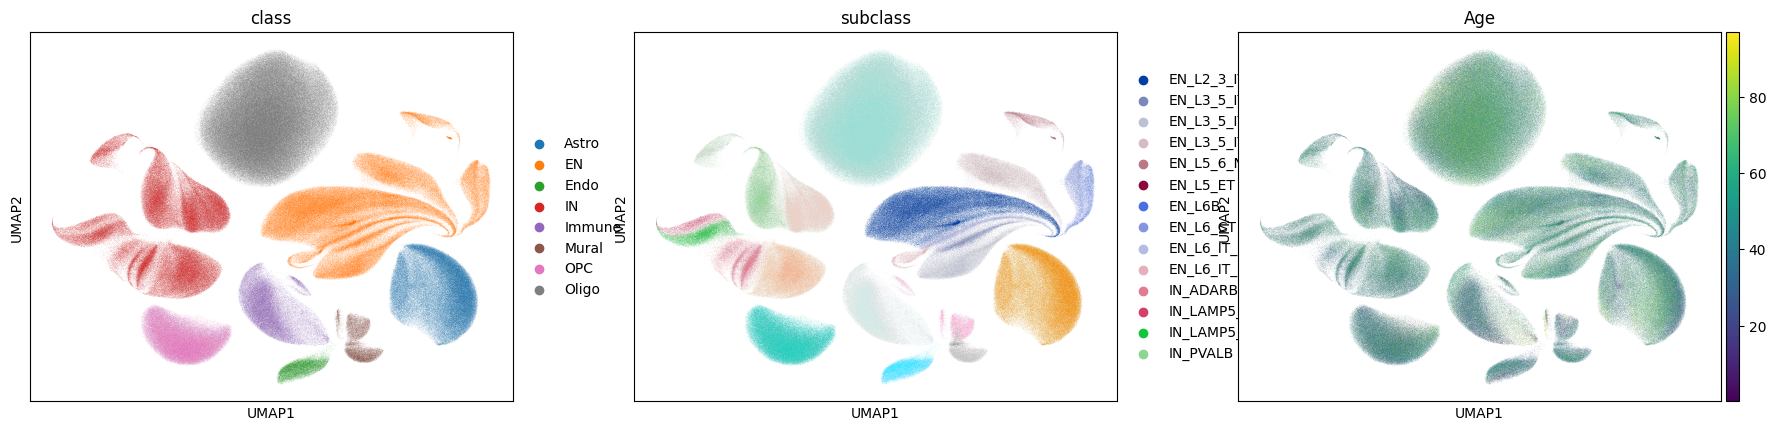

In [3]:
sc.pl.umap(ad_284_pc, color = ['class', 'subclass', 'Age'])

KeyError: 'Could not find key MALAT1 in .var_names or .obs.columns.'

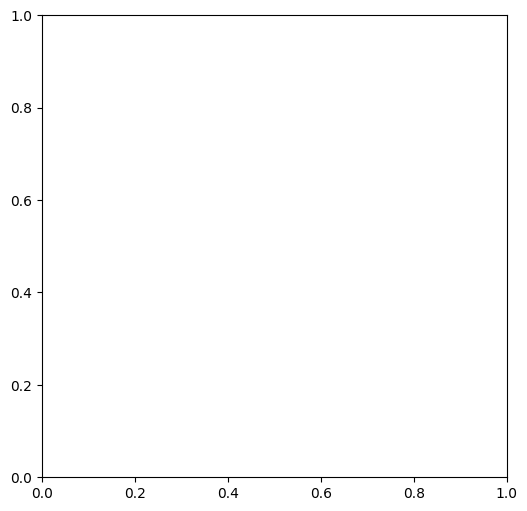

In [5]:
sc.pl.umap(ad_284_pc, color = ['MALAT1'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)


# Data from Tereza

## Load data

In [2]:
adata = sc.read('/sc/arion/projects/CommonMind/aging/input_files/freeze3.0/aging_umap_age.h5ad')
adata # 1,307,674 × 16,594

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 1307674 × 16594
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'subclass_ord', 'Age', 'Age_group', 'Age_group_ord'
    var: 'gene_id', 'gene_name', 'gene_type', 'g

In [3]:
adata.uns['pca_ncomps']

30

In [21]:
adata.uns['subclass_ord_colors']

array(['#659ec7', '#95b9c7', '#6495ed', '#79baec', '#0020c2', '#4863a0',
       '#3bb9ff', '#b4cfec', '#1589ff', '#488ac7', '#4e8975', '#7bccb5',
       '#3b9c9c', '#b2c248', '#008080', '#728c00', '#89c35c', '#f75d59',
       '#c11b17', '#6f4e37', '#e0b0ff', '#4e387e', '#b93b8f', '#ffa62f',
       '#c19a6b', '#ece5b6', '#fff380'], dtype=object)

In [22]:
adata.uns['subclass_colors']

array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#11c638',
       '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708', '#0fcfc0',
       '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1', '#f79cd4', '#7f7f7f',
       '#c7c7c7', '#1ce6ff', '#336600'], dtype=object)

In [3]:
adata.obs['Age_group'].value_counts()

Middle Adulthood    449326
Late Adulthood      323455
Young Adulthood     275896
Adolescence         188093
Childhood            46536
Neonatal             24368
Name: Age_group, dtype: int64

In [20]:
test = sc.read_h5ad('/sc/arion/projects/CommonMind/aging/input_files/freeze3.0/Aging_freeze3.0_full_std1_000.h5ad')
test

AnnData object with n_obs × n_vars = 1307674 × 34890
    obs: 'Channel', 'SubID', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'IN_SST', 'IN_SST_HGF', 'IN_SST_NPY', 'IN_VIP', 'Immune', 'Micro_PVM', 'OPC', 'Oligo', 'PC', 'RB', 'SMC', 'VLMC', 'projID', 'date', 'pool', 'flowcell', 'lane', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_

## UMAP

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


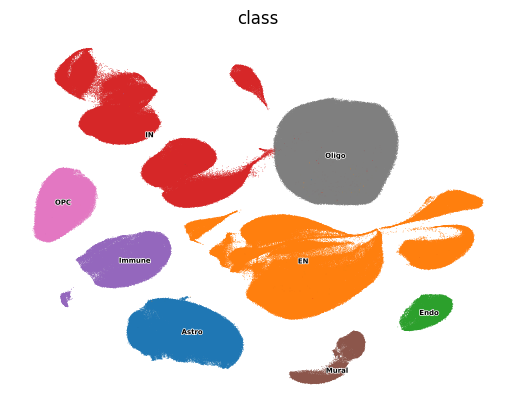

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


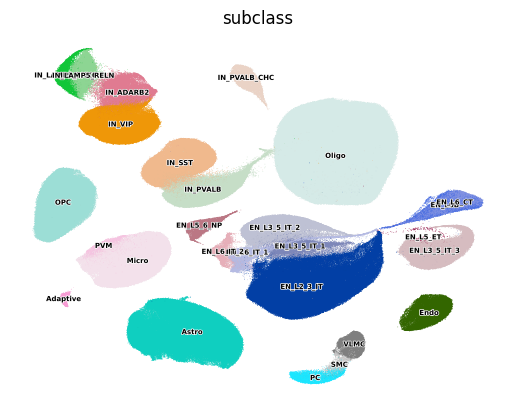

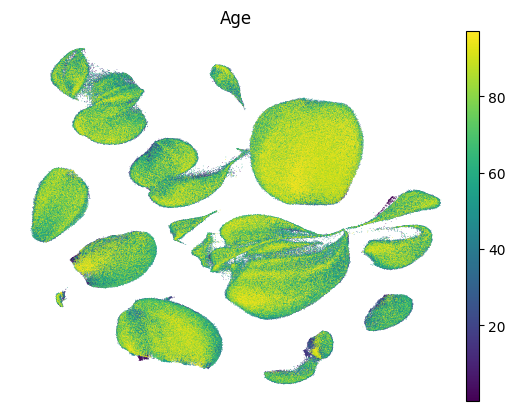

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


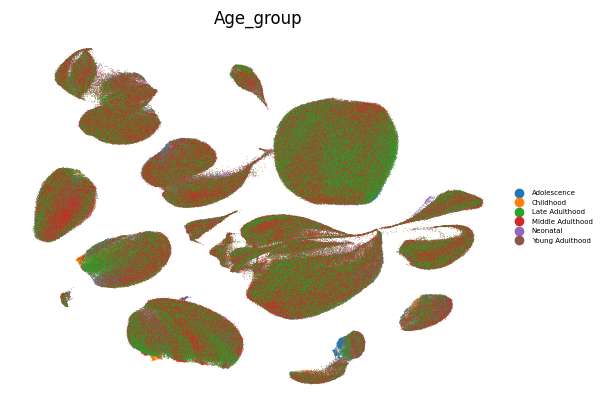

In [5]:
sc.pl.umap(adata, color = ['class'], legend_loc='on data', frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)
sc.pl.umap(adata, color = ['subclass'], legend_loc='on data', frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)
sc.pl.umap(adata, color = ['Age'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)
sc.pl.umap(adata, color = ['Age_group'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)


/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


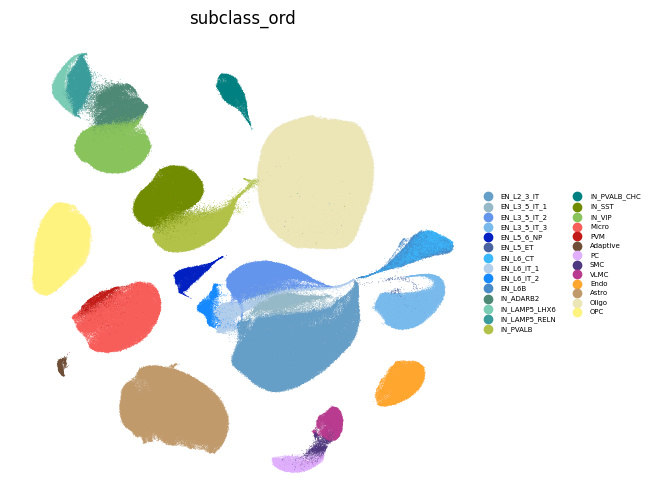

In [18]:
sc.pl.umap(adata, color = ['subclass_ord'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


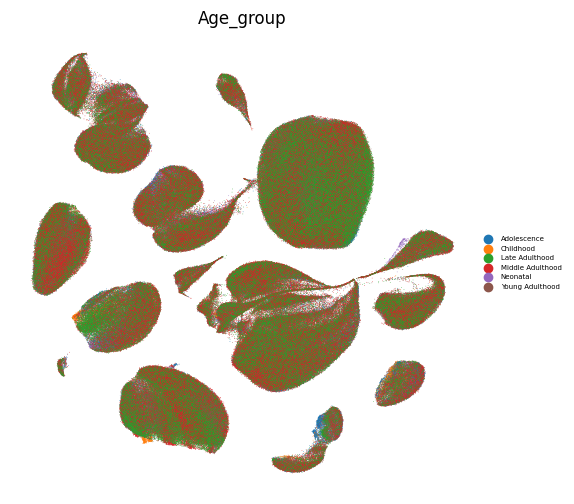

/sc/arion/work/yangh17/conda/envs/snRNAseq_py3.9/lib/python3.9/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


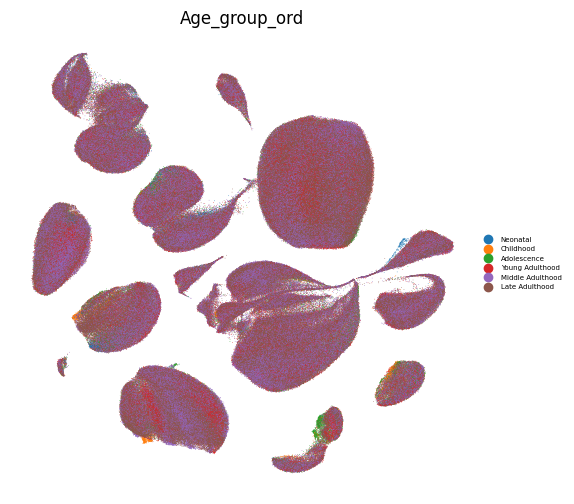

In [19]:
sc.pl.umap(adata, color = ['Age_group'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)
sc.pl.umap(adata, color = ['Age_group_ord'], frameon=False, legend_fontsize=5, legend_fontoutline=1, size=1, wspace=0, ncols=1)
